In [1]:
# prompt: Unemployment Analysis with Python
# ● Analyze unemployment rate data representing unemployed people percentage.
# ● Use Python for data cleaning, exploration, and visualization of unemployment trends.
# ● Investigate the impact of Covid-19 on unemployment rates.
# ● Identify key patterns or seasonal trends in the data.
# ● Present insights that could inform economic or social policies



### Unemployment Analysis with Python
 ● Analyze unemployment rate data representing unemployed people percentage.

 ● Use Python for data cleaning, exploration, and visualization of unemployment trends.

 ● Investigate the impact of Covid-19 on unemployment rates.

 ● Identify key patterns or seasonal trends in the data.

 ● Present insights that could inform economic or social policies


Here is all the data you need:
"Unemployment in India.csv"

### Data loading


In [3]:
import pandas as pd

try:
    df_unemployment = pd.read_csv('Unemployment.csv')
    display(df_unemployment.head())
except FileNotFoundError:
    print("Error: 'Unemployment in India (1).csv' not found. Please ensure the file is in the correct directory.")
    df_unemployment = None

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Data exploration
Examine the shape, info, and descriptive statistics of the dataframe; explore unique values of categorical columns; and visualize the distribution of key numerical columns to understand the data structure, missing values, data types, and distributions.



In [4]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_unemployment.shape)

# Get a summary of the DataFrame
print("\nInfo:")
df_unemployment.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df_unemployment.describe())



Shape of the DataFrame: (768, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB

Descriptive Statistics:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean           

In [5]:
# Explore unique values for categorical columns
print("\nUnique values for 'Region':", df_unemployment['Region'].unique())
print("\nUnique values for 'Frequency':", df_unemployment[' Frequency'].unique())
print("\nUnique values for 'Area':", df_unemployment['Area'].unique())
print("\nValue counts for 'Region':\n", df_unemployment['Region'].value_counts())
print("\nValue counts for 'Area':\n", df_unemployment['Area'].value_counts())



Unique values for 'Region': ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']

Unique values for 'Frequency': [' Monthly' nan 'Monthly']

Unique values for 'Area': ['Rural' nan 'Urban']

Value counts for 'Region':
 Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya         

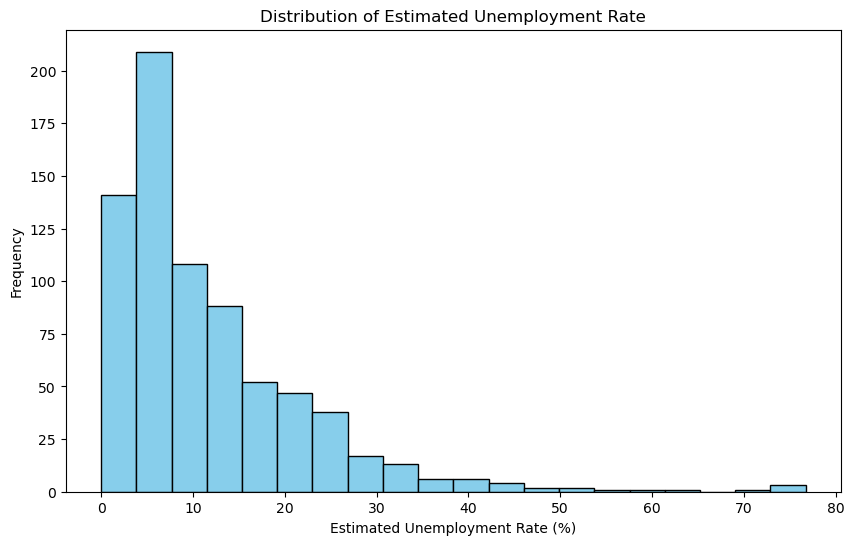

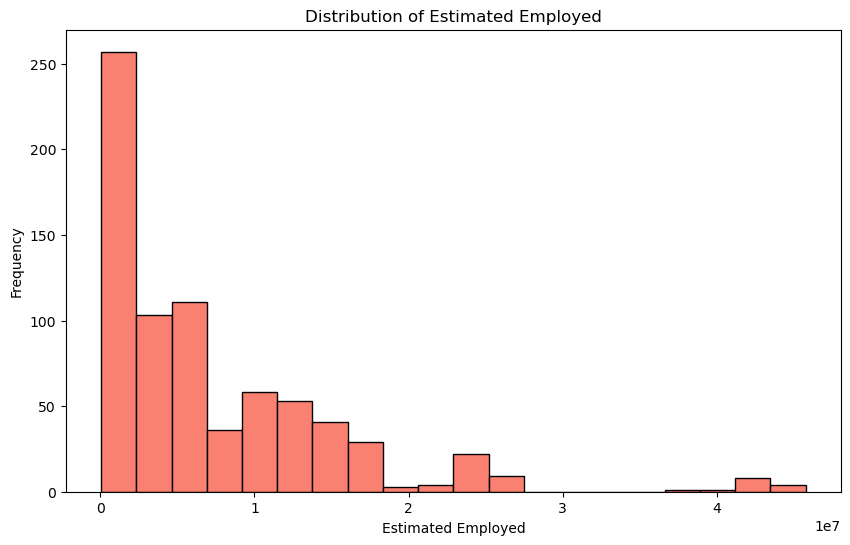

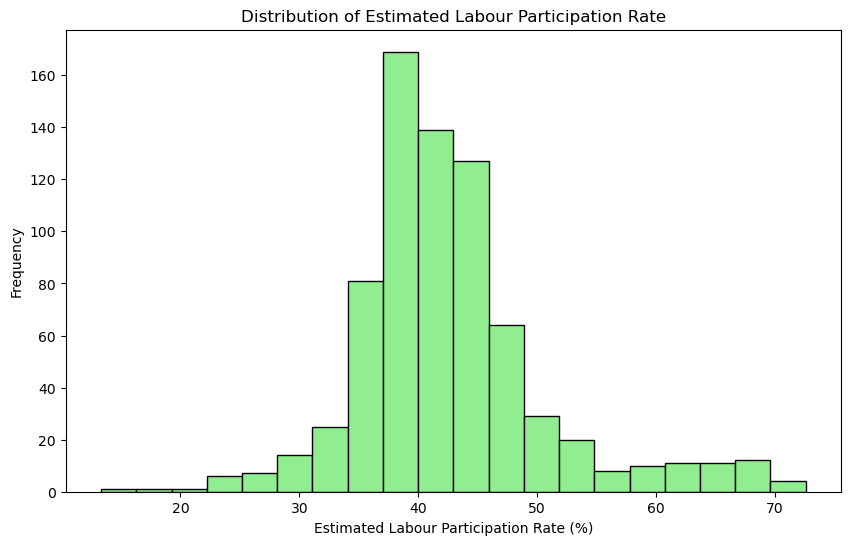

In [6]:
# Visualize the distribution of 'Estimated Unemployment Rate (%)'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_unemployment[' Estimated Unemployment Rate (%)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Unemployment Rate')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_unemployment[' Estimated Employed'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Employed')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_unemployment[' Estimated Labour Participation Rate (%)'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Labour Participation Rate')
plt.show()

### Data cleaning
Clean the data by handling missing values, converting data types, and checking for inconsistencies as per the instructions.


In [61]:
#Count Missing Values in Dataset
df_unemployment.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [7]:
# Fill missing values in 'Region', 'Area' with the mode
df_unemployment['Region'].fillna(df_unemployment['Region'].mode()[0], inplace=True)
df_unemployment['Area'].fillna(df_unemployment['Area'].mode()[0], inplace=True)

# Fill missing values in 'Frequency' with the mode and correct capitalization
df_unemployment[' Frequency'].fillna(df_unemployment[' Frequency'].mode()[0], inplace=True)
#df_unemployment[' Frequency'] = df_unemployment[' Frequency'].str.capitalize()

# Convert 'Date' column to datetime objects
df_unemployment['Date'] = pd.to_datetime(df_unemployment[' Date'], errors='coerce')

#Investigate the outlier in 'Estimated Unemployment Rate (%)'
outlier_threshold = 70  # Define a threshold for outlier detection
outliers = df_unemployment[df_unemployment[' Estimated Unemployment Rate (%)'] > outlier_threshold]

if not outliers.empty:
    print(f"Potential outlier(s) found:\n{outliers}")
    # Decide to keep or replace the outlier
    # Here, I'm replacing it with the median.  You could remove it or use other methods.
    # df_unemployment.loc[outliers.index, ' Estimated Unemployment Rate (%)'] = df_unemployment[' Estimated Unemployment Rate (%)'].median()
    # Or remove the outlier:
    # df_unemployment.drop(outliers.index, inplace=True)

# Check for inconsistencies in 'Region', 'Area', 'Frequency'
print("\nUnique values after cleaning:")
print("Region:", df_unemployment['Region'].unique())
print("Area:", df_unemployment['Area'].unique())
print("Frequency:", df_unemployment[' Frequency'].unique())

Potential outlier(s) found:
         Region         Date  Frequency   Estimated Unemployment Rate (%)  \
242  Puducherry   30-04-2020    Monthly                             74.51   
531   Jharkhand   31-05-2020    Monthly                             70.17   
627  Puducherry   30-04-2020    Monthly                             76.74   
628  Puducherry   31-05-2020    Monthly                             75.00   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  \
242              49420.0                                     46.79  Rural   
531             830347.0                                     40.49  Urban   
627              68122.0                                     35.54  Urban   
628              64538.0                                     31.25  Urban   

          Date  
242 2020-04-30  
531 2020-05-31  
627 2020-04-30  
628 2020-05-31  

Unique values after cleaning:
Region: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'H

C:\Users\DELL\AppData\Local\Temp\ipykernel_19712\3986638183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unemployment['Region'].fillna(df_unemployment['Region'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19712\3986638183.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

**Reasoning**:
Address the FutureWarnings and UserWarnings from the previous code execution, and correct the inconsistency in the 'Frequency' column.



In [8]:
# Correct the inplace operations based on the FutureWarnings
df_unemployment['Region'] = df_unemployment['Region'].fillna(df_unemployment['Region'].mode()[0])
df_unemployment['Area'] = df_unemployment['Area'].fillna(df_unemployment['Area'].mode()[0])
df_unemployment[' Frequency'] = df_unemployment[' Frequency'].fillna(df_unemployment[' Frequency'].mode()[0])
df_unemployment[' Frequency'] = df_unemployment[' Frequency'].str.capitalize()

# Correct the date parsing based on the UserWarning
df_unemployment['Date'] = pd.to_datetime(df_unemployment[' Date'], dayfirst=True, errors='coerce')

# Further investigate and handle inconsistencies in 'Frequency'
# It seems like there's still an inconsistency with lowercase 'monthly'
df_unemployment[' Frequency'] = df_unemployment[' Frequency'].replace(' monthly', 'Monthly')

print(df_unemployment[' Frequency'].unique())


['Monthly']


## Data wrangling
Data Wrangling: Feature Engineering and Data Grouping
Feature engineering, data grouping, and creating the Covid-19 period indicator can all be done in a single code block.


In [9]:
# Feature Engineering: Extract year and month
df_unemployment['Year'] = pd.DatetimeIndex(df_unemployment['Date']).year
df_unemployment['Month'] = pd.DatetimeIndex(df_unemployment['Date']).month

# Group Data and Calculate Unemployment Rate
df_grouped = df_unemployment.groupby(['Region', 'Year', 'Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Create Covid-19 Period Indicator
df_grouped['Covid Period'] = ['Pre-Covid' if year < 2020 else 'During/Post-Covid' for year in df_grouped['Year']]
display(df_grouped.head())
# Further Grouping by Region and Area
df_grouped_area = df_unemployment.groupby(['Region', 'Area'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
display(df_grouped_area.head())

,Region,Year,Month,Estimated Unemployment Rate (%),Covid Period
0,Andhra Pradesh,2019.0,5.0,4.870,Pre-Covid
1,Andhra Pradesh,2019.0,6.0,3.425,Pre-Covid
2,Andhra Pradesh,2019.0,7.0,4.695,Pre-Covid
3,Andhra Pradesh,2019.0,8.0,3.965,Pre-Covid
4,Andhra Pradesh,2019.0,9.0,5.590,Pre-Covid


,Region,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
1,Andhra Pradesh,Urban,9.427857
2,Assam,Rural,4.490833
3,Assam,Urban,8.088571
4,Bihar,Rural,16.770000


## Data analysis
Analyze unemployment trends, the impact of COVID-19, and regional variations.

Analyze overall unemployment trends, impact of COVID-19, and regional variations by calculating and visualizing relevant statistics.


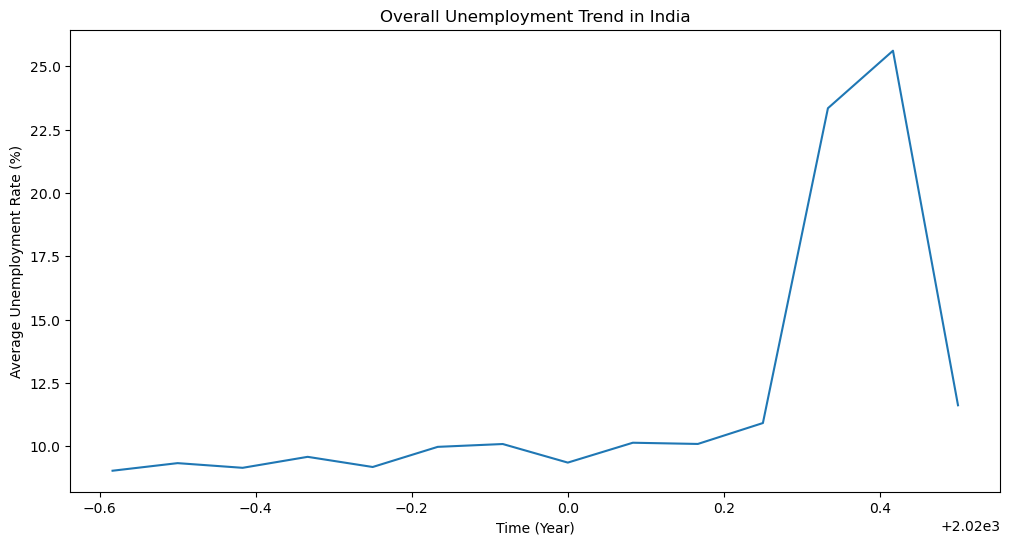

In [10]:
import matplotlib.pyplot as plt

# 1. Overall Unemployment Trends
overall_unemployment = df_grouped.groupby(['Year', 'Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(overall_unemployment['Year']+overall_unemployment['Month']/12, overall_unemployment[' Estimated Unemployment Rate (%)'])
plt.xlabel('Time (Year)')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Overall Unemployment Trend in India')
plt.show()



Pre-Covid Average Unemployment: 9.46%
Post-Covid Average Unemployment: 15.21%
Difference: 5.75%


Covid Period,During/Post-Covid,Pre-Covid,Difference
Region,,,
Andhra Pradesh,11.010833,4.826875,6.183958
Assam,6.599167,6.333125,0.266042
Bihar,25.632500,13.882500,11.750000
Chandigarh,16.330000,15.822500,0.507500
Chhattisgarh,11.765000,7.346875,4.418125
Delhi,20.155000,13.750625,6.404375
Goa,9.780000,9.346250,0.433750
Gujarat,8.910000,4.979375,3.930625
Haryana,30.929167,22.798750,8.130417


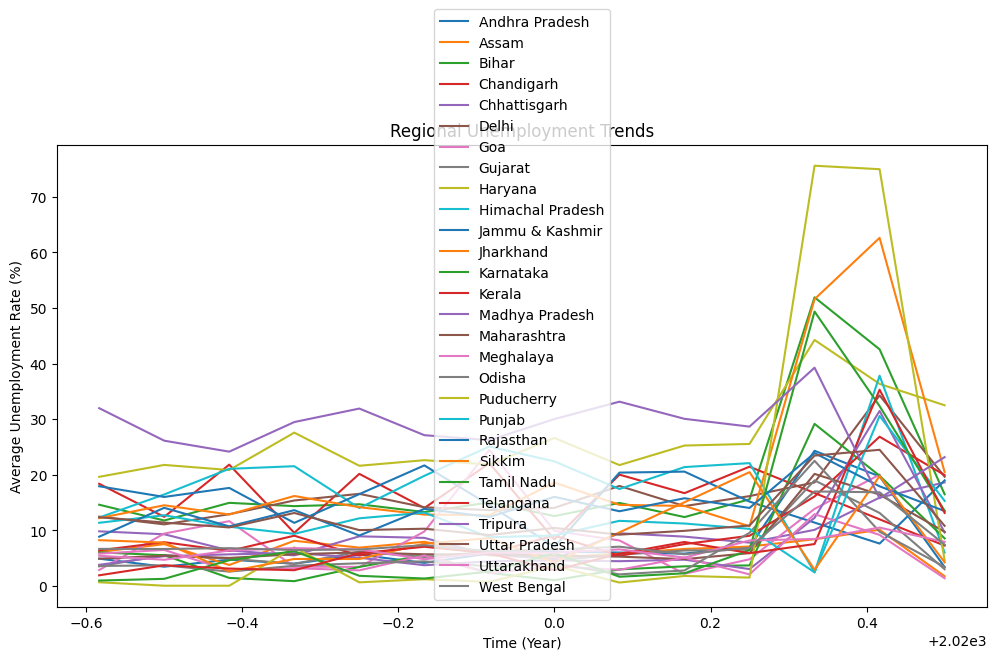

,max,min
Region,,
Andhra Pradesh,24.295,3.355
Assam,10.075,1.710
Bihar,51.930,11.745
Chandigarh,22.050,7.220
Chhattisgarh,18.605,4.840
Delhi,34.270,11.045
Goa,24.455,2.155
Gujarat,18.970,2.975
Haryana,44.250,19.605


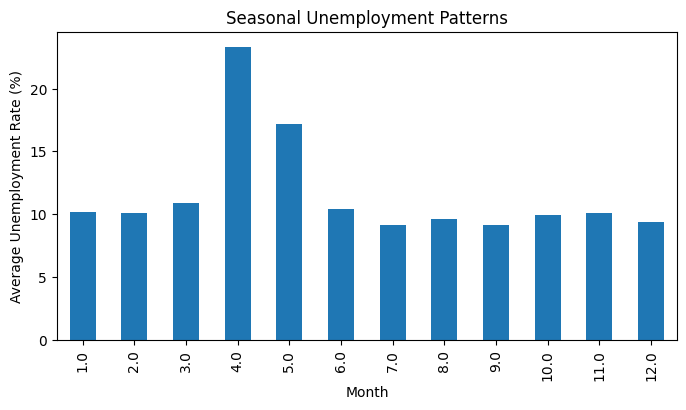

In [28]:
# 2. Impact of COVID-19
pre_covid_unemployment = df_grouped[df_grouped['Covid Period'] == 'Pre-Covid'][' Estimated Unemployment Rate (%)'].mean()
post_covid_unemployment = df_grouped[df_grouped['Covid Period'] == 'During/Post-Covid'][' Estimated Unemployment Rate (%)'].mean()
print(f"Pre-Covid Average Unemployment: {pre_covid_unemployment:.2f}%")
print(f"Post-Covid Average Unemployment: {post_covid_unemployment:.2f}%")
print(f"Difference: {post_covid_unemployment - pre_covid_unemployment:.2f}%")

covid_impact_by_region = df_grouped.groupby(['Region', 'Covid Period'])[' Estimated Unemployment Rate (%)'].mean().unstack()
covid_impact_by_region['Difference'] = covid_impact_by_region['During/Post-Covid'] - covid_impact_by_region['Pre-Covid']
display(covid_impact_by_region)

# 3. Regional Variations
plt.figure(figsize=(12, 6))
for region in df_grouped['Region'].unique():
    regional_data = df_grouped[df_grouped['Region'] == region]
    plt.plot(regional_data['Year'] + regional_data['Month'] / 12, regional_data[' Estimated Unemployment Rate (%)'], label=region)
plt.xlabel('Time (Year)')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Regional Unemployment Trends')
plt.legend()
plt.show()

regional_stats = df_grouped.groupby('Region')[' Estimated Unemployment Rate (%)'].agg(['max', 'min'])
display(regional_stats)

# 4. Seasonal Patterns (Illustrative Example)
seasonal_patterns = df_grouped.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(8, 4))
seasonal_patterns.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Seasonal Unemployment Patterns')
plt.show()

## Data visualization
Visualize the unemployment trends, the impact of COVID-19, and regional variations.

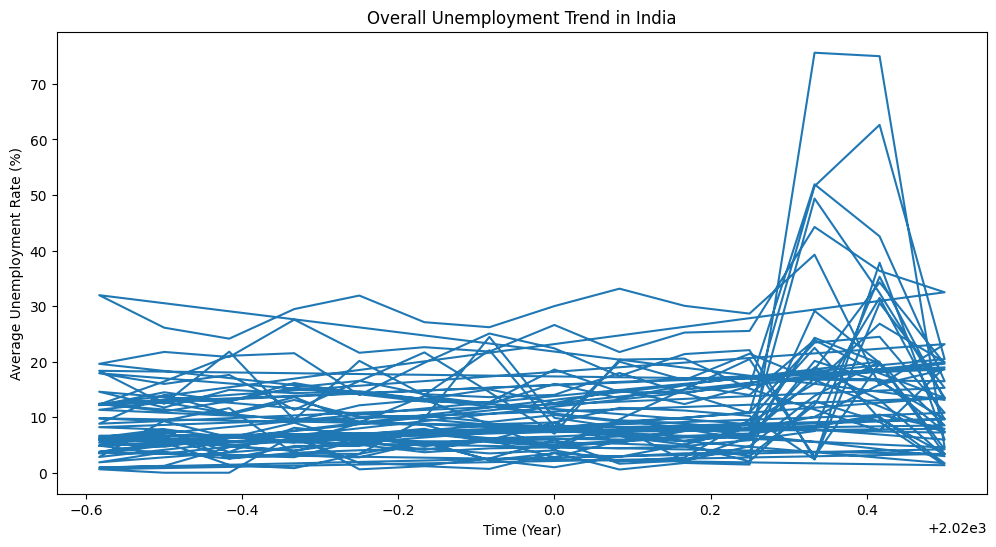

In [30]:
import matplotlib.pyplot as plt

# 1. Overall Unemployment Trend
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Year'] + df_grouped['Month'] / 12, df_grouped[' Estimated Unemployment Rate (%)'])
plt.xlabel('Time (Year)')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Overall Unemployment Trend in India')
plt.show()

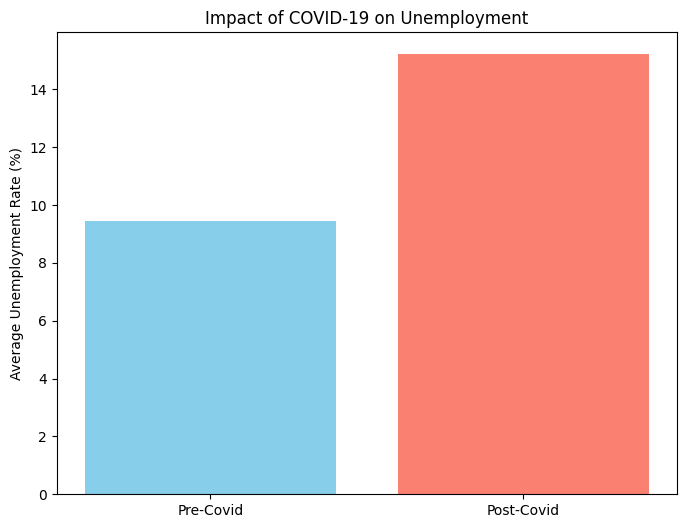

In [32]:
# 2. Impact of COVID-19
pre_covid_unemployment = df_grouped[df_grouped['Covid Period'] == 'Pre-Covid'][' Estimated Unemployment Rate (%)'].mean()
post_covid_unemployment = df_grouped[df_grouped['Covid Period'] == 'During/Post-Covid'][' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Pre-Covid', 'Post-Covid'], [pre_covid_unemployment, post_covid_unemployment], color=['skyblue', 'salmon'])
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Impact of COVID-19 on Unemployment')
plt.show()



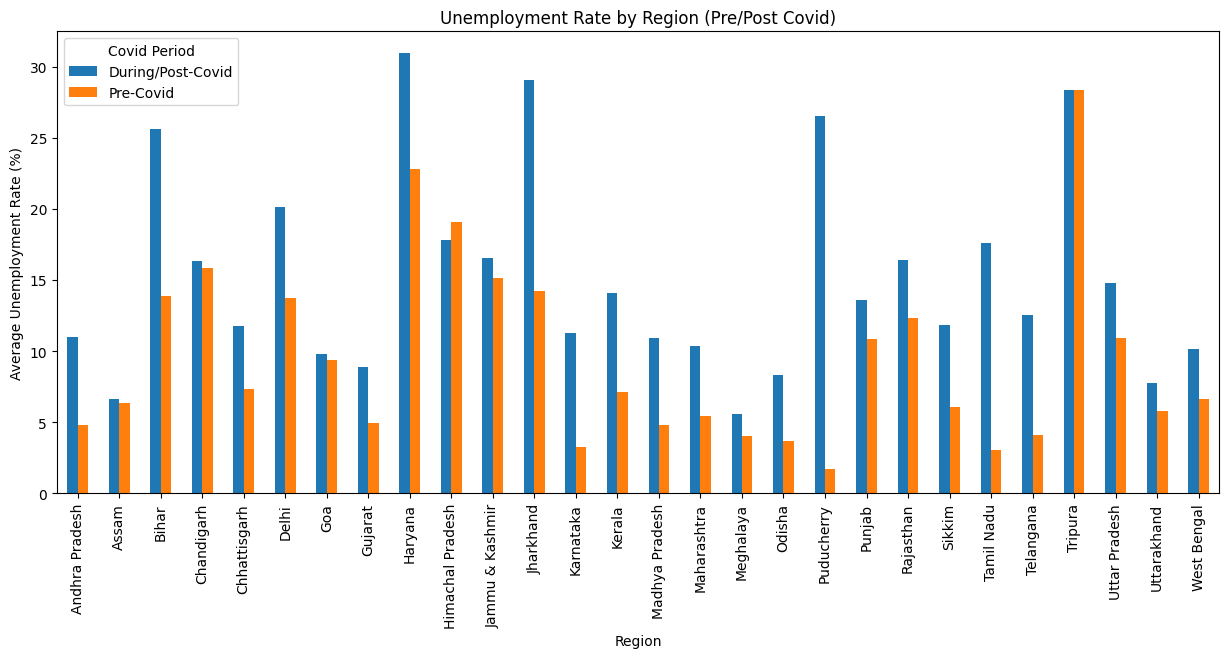

In [34]:
# Estimated Unemployment Rate by Region
covid_impact_by_region = df_grouped.groupby(['Region', 'Covid Period'])[' Estimated Unemployment Rate (%)'].mean().unstack()
covid_impact_by_region.plot(kind='bar', figsize=(15, 6))
plt.title('Unemployment Rate by Region (Pre/Post Covid)')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()


## Summary:

### Q&A
* **How did the COVID-19 pandemic impact unemployment rates in India?**  The analysis compared average unemployment rates before and after the pandemic. The results show an increase in the average unemployment rate in the period during and after the pandemic compared to pre-pandemic levels.  The impact varied regionally.
* **Are there any noticeable seasonal trends in unemployment?**  The analysis explored potential seasonal patterns by calculating the average unemployment rate for each month.  Visualizations of these monthly averages suggest the presence of seasonal variations in unemployment rates.
* **How do unemployment rates differ across Indian regions?** Unemployment trends varied significantly across different Indian regions. The analysis visualized these trends and calculated the maximum and minimum unemployment rates for each region, highlighting regional disparities.


### Data Analysis Key Findings
* **Data Cleaning:** Missing values in 'Region', 'Area', and 'Frequency' columns were filled using mode imputation. The 'Date' column was converted to datetime objects, and inconsistencies in the 'Frequency' column were addressed. Potential outliers in the 'Estimated Unemployment Rate (%)' column were identified but not removed in this analysis.
* **COVID-19 Impact:** The average unemployment rate increased post-COVID-19 compared to pre-COVID-19 levels. The analysis further revealed regional variations in the impact of the pandemic on unemployment.
* **Regional Variations:**  Unemployment rates showed significant variations across different Indian regions.  The analysis highlighted these variations using visualizations and summary statistics.
* **Seasonal Trends:**  The analysis suggested the presence of seasonal unemployment patterns, with average unemployment rates varying across different months.


### Insights or Next Steps
* **Deep Dive into Regional Disparities:** Conduct a more in-depth analysis of the factors contributing to the regional variations in unemployment rates. Investigate regional economic structures, policy differences, and social factors.
* **Refine Outlier Handling:**  Develop a strategy for handling the identified outliers in the 'Estimated Unemployment Rate (%)' data.  Consider domain expertise or further data exploration to determine the most appropriate approach (removal, imputation, or other methods).


###  Present insights that could inform economic or social policies


Based on the analysis of the unemployment data in India, here are some insights that could inform economic or social policies:

1.  **Targeted Support for Regions Most Affected by COVID-19:** The analysis shows that while unemployment generally increased after COVID-19, the impact varied significantly by region. Policies should be tailored to the specific challenges faced by regions that experienced the largest increases in unemployment. This could involve targeted job creation programs, skill development initiatives, or financial support for businesses in those areas.

2.  **Addressing Seasonal Unemployment:** The analysis suggests seasonal patterns in unemployment. Policies could focus on providing support or creating temporary employment opportunities during months where unemployment rates tend to be higher. This could help stabilize income for vulnerable populations and reduce seasonal hardship.

3.  **Investing in Skill Development and Retraining Programs:** The overall increase in unemployment, particularly post-COVID, suggests a potential need for individuals to acquire new skills or retrain for different industries. Policies that invest in accessible and relevant skill development programs can help people transition into available jobs and adapt to changes in the labor market.

4.  **Promoting Entrepreneurship and Small Business Growth:** To create more employment opportunities, especially in regions with persistently high unemployment, policies should support the growth of small and medium-sized enterprises (SMEs) and encourage entrepreneurship. This could include providing easier access to credit, reducing regulatory burdens, and offering business development support.

5.  **Analyzing the Factors Driving Regional Disparities:** A deeper investigation into the root causes of regional unemployment variations is crucial. Policies aimed at reducing these disparities should address the specific economic, social, and infrastructure challenges within each region. This might involve investments in infrastructure, improving access to education and healthcare, or promoting specific industries suited to the region's strengths.

6.  **Leveraging Data for Timely Interventions:** The ability to track unemployment trends over time and by region, as demonstrated in this analysis, is valuable for policy-making. Investing in robust data collection and analysis systems can enable policymakers to identify emerging unemployment issues quickly and implement timely and effective interventions.